In [13]:
import pandas as pd
import pandas_datareader.data as pdr
import yfinance as yf
import datetime as dt
import time
from PyPortfolio import *
from tqdm.auto import tqdm
yf.pdr_override()
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:

start = dt.datetime(2005,1,2)
end = dt.datetime.today()
prices_daily = pdr.get_data_yahoo(['^GSPC','^NSEI', '^FTSE'], start=start, end=end)
prices_monthly = prices_daily['Adj Close'].resample('M').last()
returns_monthly = prices_monthly.pct_change().dropna()


[*********************100%***********************]  3 of 3 completed


In [57]:
riskreturn_object = RiskReturn(return_series=returns_monthly, periodicity='M')

In [58]:

portfolio_object = PyPortfolio(return_series=returns_monthly, periodicity='M')


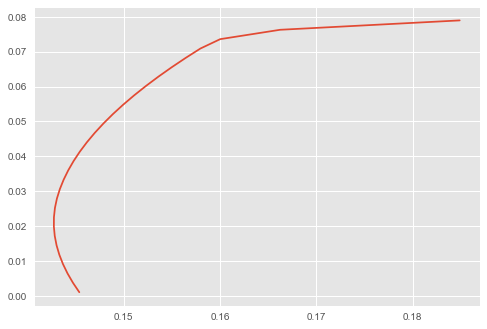

In [65]:
z = portfolio_object.EfficientFrontier()[0]
plt.plot(z['Portfolio Volatility'] ,z['Portfolio Return'])

In [62]:
z

,Portfolio Return,Portfolio Volatility
0,0.001120,0.145403
1,0.003804,0.144749
2,0.006487,0.144184
3,0.009170,0.143711
4,0.011853,0.143331
5,0.014537,0.143046
6,0.017220,0.142856
7,0.019903,0.142764
8,0.022586,0.142771
9,0.025270,0.142877
